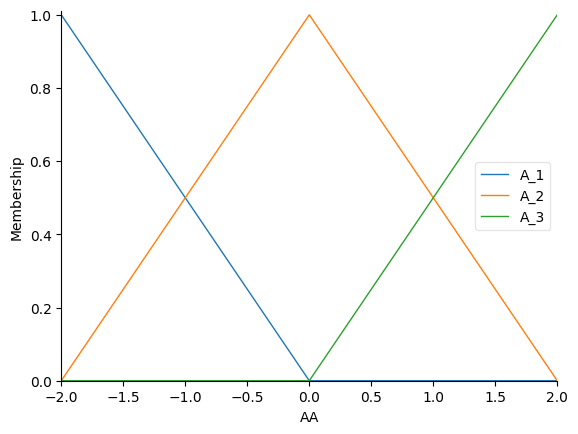

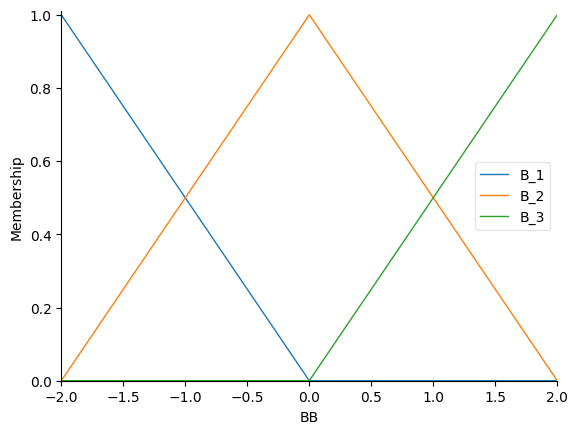

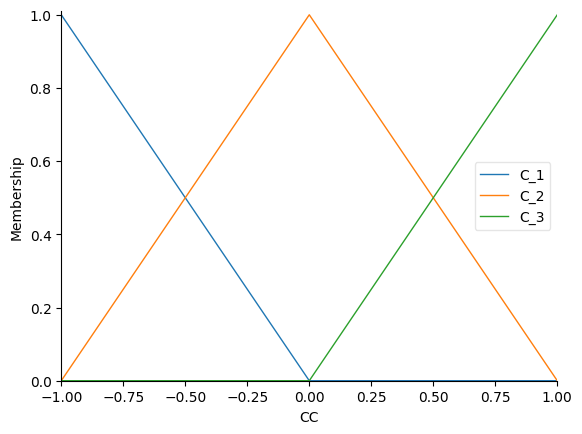

In [45]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

AA = ctrl.Antecedent(np.arange(-2,2.01,0.01), 'AA')
BB = ctrl.Antecedent(np.arange(-2,2.01,0.01), 'BB')
CC = ctrl.Consequent(np.arange(-1,1.01,0.01), 'CC')

AA['A_1'] = fuzz.trapmf(AA.universe, [-5,-4,-2,0])
AA['A_2'] = fuzz.trimf(AA.universe, [-2,0,2])
AA['A_3'] = fuzz.trapmf(AA.universe, [0,2,4,5])

BB['B_1'] = fuzz.trapmf(BB.universe, [-5,-4,-2,0])
BB['B_2'] = fuzz.trimf(BB.universe, [-2,0,2])
BB['B_3'] = fuzz.trapmf(BB.universe, [0,2,4,5])

CC['C_1'] = fuzz.trapmf(CC.universe, [-5,-4,-1,0])
CC['C_2'] = fuzz.trimf(CC.universe, [-1,0,1])
CC['C_3'] = fuzz.trapmf(CC.universe, [0,1,4,5])

AA.view()
BB.view()
CC.view()

regula1 = ctrl.Rule(AA['A_1'] & BB['B_2'], CC['C_1'])
regula2 = ctrl.Rule(AA['A_1'] & BB['B_3'], CC['C_1'] )
regula3 = ctrl.Rule(AA['A_2'] & BB['B_2'], CC['C_2'] )
regula4 = ctrl.Rule(AA['A_2'] & BB['B_3'], CC['C_3'] )

CC_ctr = ctrl.ControlSystem([regula1,regula2,regula3,regula4])
CC_sym = ctrl.ControlSystemSimulation(CC_ctr)




output:  -0.6666666666666663
Najmniejsza możliwa otrzymana wartość CC:  -0.5619210326499561
Największa możliwa otrzymana wartość CC:  0.5619210326499632


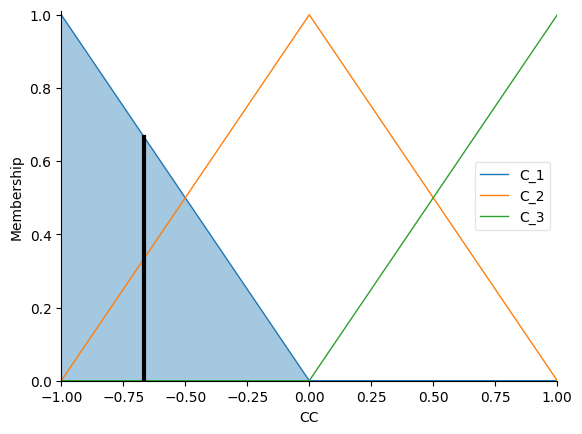

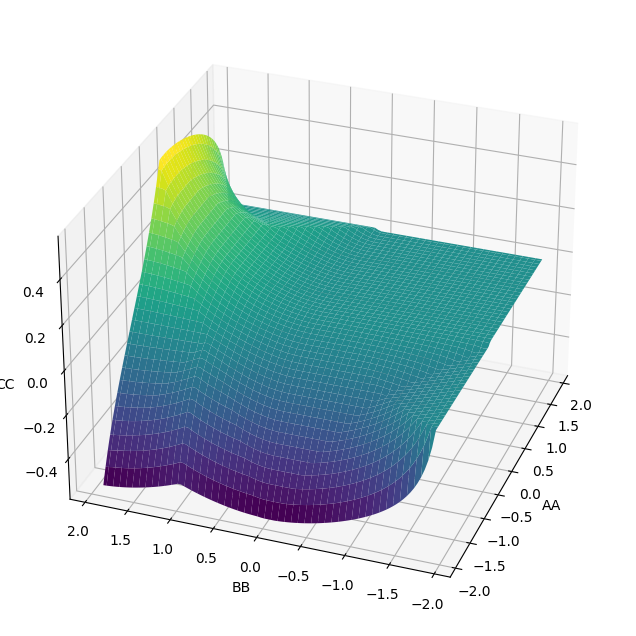

In [46]:
CC_sym.input['AA']= -2
CC_sym.input['BB']= 0



CC_sym.compute()
print("output: ", CC_sym.output['CC'])
CC.view(sim=CC_sym)

n_points = 100
upsampled = np.linspace(-1.9, 1.9, n_points)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(n_points):
    for j in range(n_points):
        CC_sym.input['AA'] = x[i, j]
        CC_sym.input['BB'] = y[i, j]
        CC_sym.compute()
        z[i, j] = CC_sym.output['CC']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('AA')
ax.set_ylabel('BB')
ax.set_zlabel('CC')
ax.view_init(30, 200)
print("Najmniejsza możliwa otrzymana wartość CC: ",z.min())
print("Największa możliwa otrzymana wartość CC: ",z.max())
plt.show()